In [2]:
# --- Imports & Configuration ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for clean output
warnings.filterwarnings('ignore')

# Set professional plotting style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11

# Show all columns
pd.set_option('display.max_columns', None)

print("Setup Complete. Libraries Loaded.")

Setup Complete. Libraries Loaded.


In [3]:
# --- Load Datasets ---
train_df = pd.read_csv('Data/train.csv')
test_df = pd.read_csv('Data/test.csv')

print(f"Train Dataset Shape: {train_df.shape}")
print(f"Test Dataset Shape: {test_df.shape}")

Train Dataset Shape: (700000, 26)
Test Dataset Shape: (300000, 25)


In [4]:
# --- Duplicate Check ---
# Checking for duplicate rows to ensure data integrity
duplicates_train = train_df.duplicated().sum()
duplicates_test = test_df.duplicated().sum()

print(f"Duplicate rows in Train Data: {duplicates_train}")
print(f"Duplicate rows in Test Data: {duplicates_test}")

if duplicates_train == 0 and duplicates_test == 0:
    print("Insight: The dataset is clean with no duplicates.")
else:
    print("Action Required: Duplicates detected.")

Duplicate rows in Train Data: 0
Duplicate rows in Test Data: 0
Insight: The dataset is clean with no duplicates.


# Exploratory Data Analysis (EDA)

In this section, I perform a comprehensive analysis of the dataset to understand the underlying patterns, detect anomalies, and verify data quality. This includes Univariate, Bivariate, and Multivariate analysis.

In [5]:
type(train_df)
type(test_df)

pandas.core.frame.DataFrame

In [6]:
# --- Data Overview ---
print("--- First 2 Rows of Training Data ---")
display(train_df.head(2))

--- First 2 Rows of Training Data ---


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
0,0,31,1,45,7.7,6.8,6.1,33.4,0.93,112,70,62,199,58,114,102,Female,Hispanic,Highschool,Lower-Middle,Current,Employed,0,0,0,1.0
1,1,50,2,73,5.7,6.5,5.8,23.8,0.83,120,77,71,199,50,121,124,Female,White,Highschool,Upper-Middle,Never,Employed,0,0,0,1.0


In [7]:
# --- Data Overview ---
print("--- First 2 Rows of Test Data ---")
display(test_df.head(2))

--- First 2 Rows of Test Data ---


,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
0,700000,45,4,100,4.3,6.8,6.2,25.5,0.84,123,70,64,209,55,135,111,Female,White,Highschool,Middle,Former,Employed,0,0,0
1,700001,35,1,87,3.5,4.6,9.0,28.6,0.88,120,74,59,159,47,83,145,Female,White,Highschool,Middle,Never,Unemployed,0,0,0


In [8]:
test_df.tail(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
299998,999998,48,3,72,4.9,6.9,1.8,27.7,0.89,121,67,86,171,50,84,138,Male,White,Highschool,Low,Current,Retired,0,1,0
299999,999999,47,1,75,5.1,8.0,2.5,26.1,0.84,132,70,87,193,46,109,107,Female,White,Graduate,Upper-Middle,Current,Employed,0,1,0


In [9]:
train_df.tail(2)

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
699998,699998,49,2,70,5.7,6.9,4.7,25.2,0.86,116,67,69,198,55,108,133,Female,White,Highschool,Lower-Middle,Never,Retired,0,0,0,1.0
699999,699999,42,4,56,4.2,7.0,6.1,28.3,0.90,99,73,74,191,63,105,159,Female,Black,Graduate,Low,Former,Employed,0,0,0,1.0


In [10]:
print("\n--- Data Info (Missing Values & Types) ---")
train_df.info()


--- Data Info (Missing Values & Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  700000 non-null  int64  
 1   age                                 700000 non-null  int64  
 2   alcohol_consumption_per_week        700000 non-null  int64  
 3   physical_activity_minutes_per_week  700000 non-null  int64  
 4   diet_score                          700000 non-null  float64
 5   sleep_hours_per_day                 700000 non-null  float64
 6   screen_time_hours_per_day           700000 non-null  float64
 7   bmi                                 700000 non-null  float64
 8   waist_to_hip_ratio                  700000 non-null  float64
 9   systolic_bp                         700000 non-null  int64  
 10  diastolic_bp                        700000 non-n

In [11]:
print("\n--- Data Info (Missing Values & Types) ---")
test_df.info()


--- Data Info (Missing Values & Types) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 25 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   id                                  300000 non-null  int64  
 1   age                                 300000 non-null  int64  
 2   alcohol_consumption_per_week        300000 non-null  int64  
 3   physical_activity_minutes_per_week  300000 non-null  int64  
 4   diet_score                          300000 non-null  float64
 5   sleep_hours_per_day                 300000 non-null  float64
 6   screen_time_hours_per_day           300000 non-null  float64
 7   bmi                                 300000 non-null  float64
 8   waist_to_hip_ratio                  300000 non-null  float64
 9   systolic_bp                         300000 non-null  int64  
 10  diastolic_bp                        300000 non-n

In [12]:
train_df.describe(include='all')

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history,diagnosed_diabetes
count,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000.000000,700000,700000,700000,700000,700000,700000,700000.000000,700000.000000,700000.000000,700000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,4,5,3,4,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,White,Highschool,Middle,Never,Employed,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,363237,386153,344145,290557,494448,516170,NaN,NaN,NaN,NaN
mean,349999.500000,50.359734,2.072411,80.230803,5.963695,7.002200,6.012733,25.874684,0.858766,116.294193,75.440924,70.167749,186.818801,53.823214,102.905854,123.081850,NaN,NaN,NaN,NaN,NaN,NaN,0.149401,0.181990,0.030324,0.623296
std,202072.738554,11.655520,1.048189,51.195071,1.463336,0.901907,2.022707,2.860705,0.037980,11.010390,6.825775,6.938722,16.730832,8.266545,19.022416,24.739397,NaN,NaN,NaN,NaN,NaN,NaN,0.356484,0.385837,0.171478,0.484560
min,0.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.680000,91.000000,51.000000,42.000000,117.000000,21.000000,51.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
25%,174999.750000,42.000000,1.000000,49.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,175.000000,48.000000,89.000000,106.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000
50%,349999.500000,50.000000,2.000000,71.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000
75%,524999.250000,58.000000,3.000000,96.000000,7.000000,7.600000,7.400000,27.800000,0.880000,124.000000,80.000000,75.000000,199.000000,59.000000,116.000000,139.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,1.000000


In [13]:
test_df.describe(include='all')

,id,age,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,sleep_hours_per_day,screen_time_hours_per_day,bmi,waist_to_hip_ratio,systolic_bp,diastolic_bp,heart_rate,cholesterol_total,hdl_cholesterol,ldl_cholesterol,triglycerides,gender,ethnicity,education_level,income_level,smoking_status,employment_status,family_history_diabetes,hypertension_history,cardiovascular_history
count,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000,300000,300000,300000,300000,300000,300000.000000,300000.000000,300000.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5,4,5,3,4,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Female,White,Highschool,Middle,Never,Employed,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,154098,168375,153355,124249,211666,217993,NaN,NaN,NaN
mean,849999.500000,50.432397,2.089693,92.349087,5.945838,6.997795,6.011278,25.881906,0.859007,116.374117,75.396013,70.048350,187.308620,53.813557,103.416083,123.538480,NaN,NaN,NaN,NaN,NaN,NaN,0.152920,0.184410,0.033110
std,86602.684716,11.938741,1.066214,62.187399,1.481068,0.914693,2.060472,2.894289,0.038523,11.252146,6.950340,7.090543,18.413053,8.398126,20.571855,28.965441,NaN,NaN,NaN,NaN,NaN,NaN,0.359911,0.387819,0.178924
min,700000.000000,19.000000,1.000000,1.000000,0.100000,3.100000,0.600000,15.100000,0.690000,91.000000,51.000000,42.000000,107.000000,22.000000,51.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,774999.750000,42.000000,1.000000,51.000000,5.000000,6.400000,4.600000,23.900000,0.830000,108.000000,71.000000,65.000000,174.000000,48.000000,89.000000,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
50%,849999.500000,50.000000,2.000000,77.000000,6.000000,7.000000,6.000000,25.900000,0.860000,116.000000,75.000000,70.000000,187.000000,54.000000,103.000000,123.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
75%,924999.250000,59.000000,3.000000,115.000000,7.000000,7.600000,7.400000,27.800000,0.890000,124.000000,80.000000,75.000000,200.000000,60.000000,117.000000,142.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000


In [14]:
train_df.isnull().sum()*100/train_df.shape[0]

id                                    0.0
age                                   0.0
alcohol_consumption_per_week          0.0
physical_activity_minutes_per_week    0.0
diet_score                            0.0
sleep_hours_per_day                   0.0
screen_time_hours_per_day             0.0
bmi                                   0.0
waist_to_hip_ratio                    0.0
systolic_bp                           0.0
diastolic_bp                          0.0
heart_rate                            0.0
cholesterol_total                     0.0
hdl_cholesterol                       0.0
ldl_cholesterol                       0.0
triglycerides                         0.0
gender                                0.0
ethnicity                             0.0
education_level                       0.0
income_level                          0.0
smoking_status                        0.0
employment_status                     0.0
family_history_diabetes               0.0
hypertension_history              

In [15]:
test_df.isnull().sum()*100/test_df.shape[0]

id                                    0.0
age                                   0.0
alcohol_consumption_per_week          0.0
physical_activity_minutes_per_week    0.0
diet_score                            0.0
sleep_hours_per_day                   0.0
screen_time_hours_per_day             0.0
bmi                                   0.0
waist_to_hip_ratio                    0.0
systolic_bp                           0.0
diastolic_bp                          0.0
heart_rate                            0.0
cholesterol_total                     0.0
hdl_cholesterol                       0.0
ldl_cholesterol                       0.0
triglycerides                         0.0
gender                                0.0
ethnicity                             0.0
education_level                       0.0
income_level                          0.0
smoking_status                        0.0
employment_status                     0.0
family_history_diabetes               0.0
hypertension_history              

In [16]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())

['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history', 'diagnosed_diabetes']
['id', 'age', 'alcohol_consumption_per_week', 'physical_activity_minutes_per_week', 'diet_score', 'sleep_hours_per_day', 'screen_time_hours_per_day', 'bmi', 'waist_to_hip_ratio', 'systolic_bp', 'diastolic_bp', 'heart_rate', 'cholesterol_total', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides', 'gender', 'ethnicity', 'education_level', 'income_level', 'smoking_status', 'employment_status', 'family_history_diabetes', 'hypertension_history', 'cardiovascular_history']


## Target Variable Analysis
Analyzing the class distribution of `diagnosed_diabetes` to check for dataset imbalance.

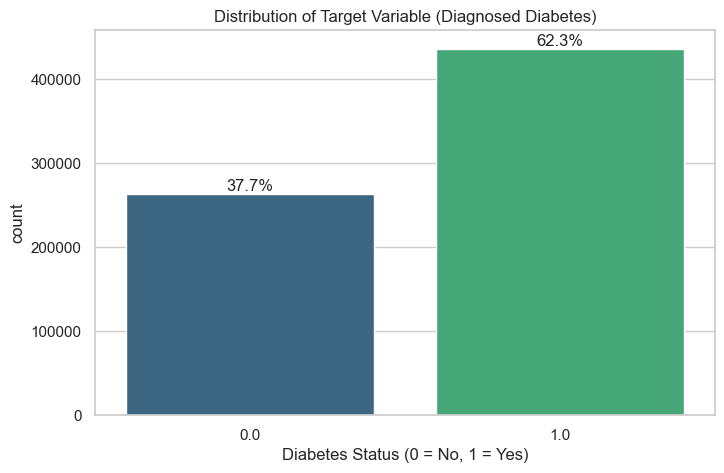

In [17]:
# --- Target Distribution ---
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='diagnosed_diabetes', data=train_df, palette='viridis')

# Add percentage labels
total = len(train_df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

plt.title('Distribution of Target Variable (Diagnosed Diabetes)')
plt.xlabel('Diabetes Status (0 = No, 1 = Yes)')
plt.show()

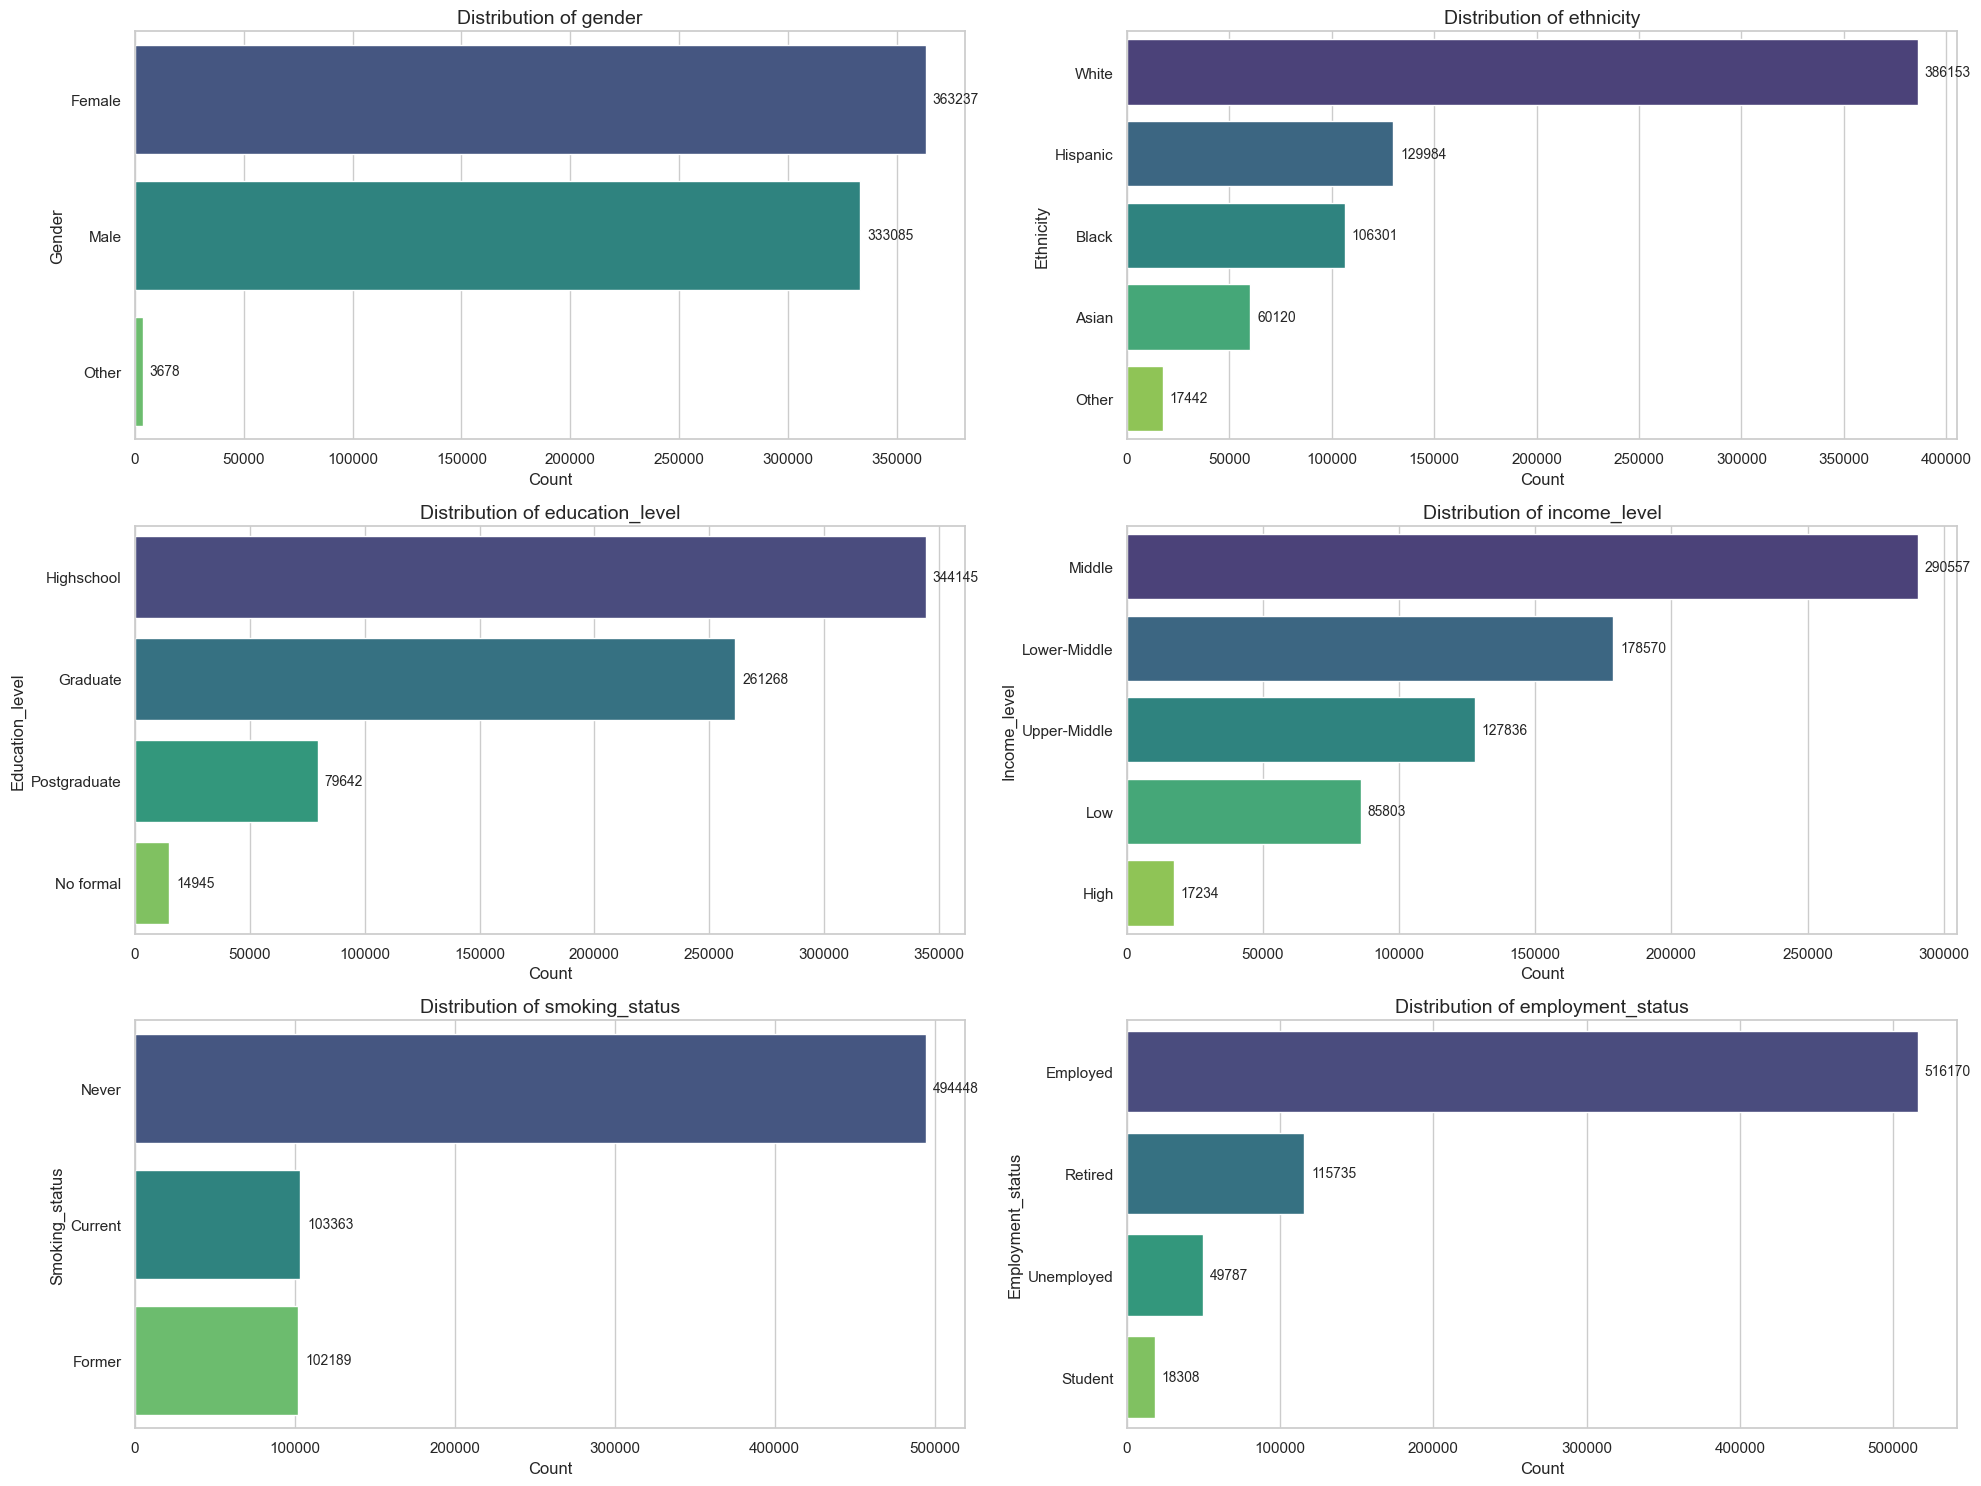

Insight: This shows the diversity of the dataset in terms of demographics and lifestyle.


In [18]:
# --- Categorical Feature Distributions ---
# Visualizing the frequency of categorical variables to understand the demographic profile.

categorical_cols = [
    'gender', 'ethnicity', 'education_level', 'income_level', 
    'smoking_status', 'employment_status'
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i+1)
    
    # Create Count Plot
    ax = sns.countplot(y=col, data=train_df, palette='viridis', order=train_df[col].value_counts().index)
    
    plt.title(f'Distribution of {col}', fontsize=14)
    plt.xlabel('Count')
    plt.ylabel(col.capitalize())
    
    # Add numbers to bars
    for p in ax.patches:
        ax.annotate(f'{int(p.get_width())}', 
                   (p.get_width(), p.get_y() + p.get_height() / 2), 
                   ha='left', va='center', fontsize=10, xytext=(5, 0), textcoords='offset points')

plt.tight_layout()
plt.show()

print("Insight: This shows the diversity of the dataset in terms of demographics and lifestyle.")

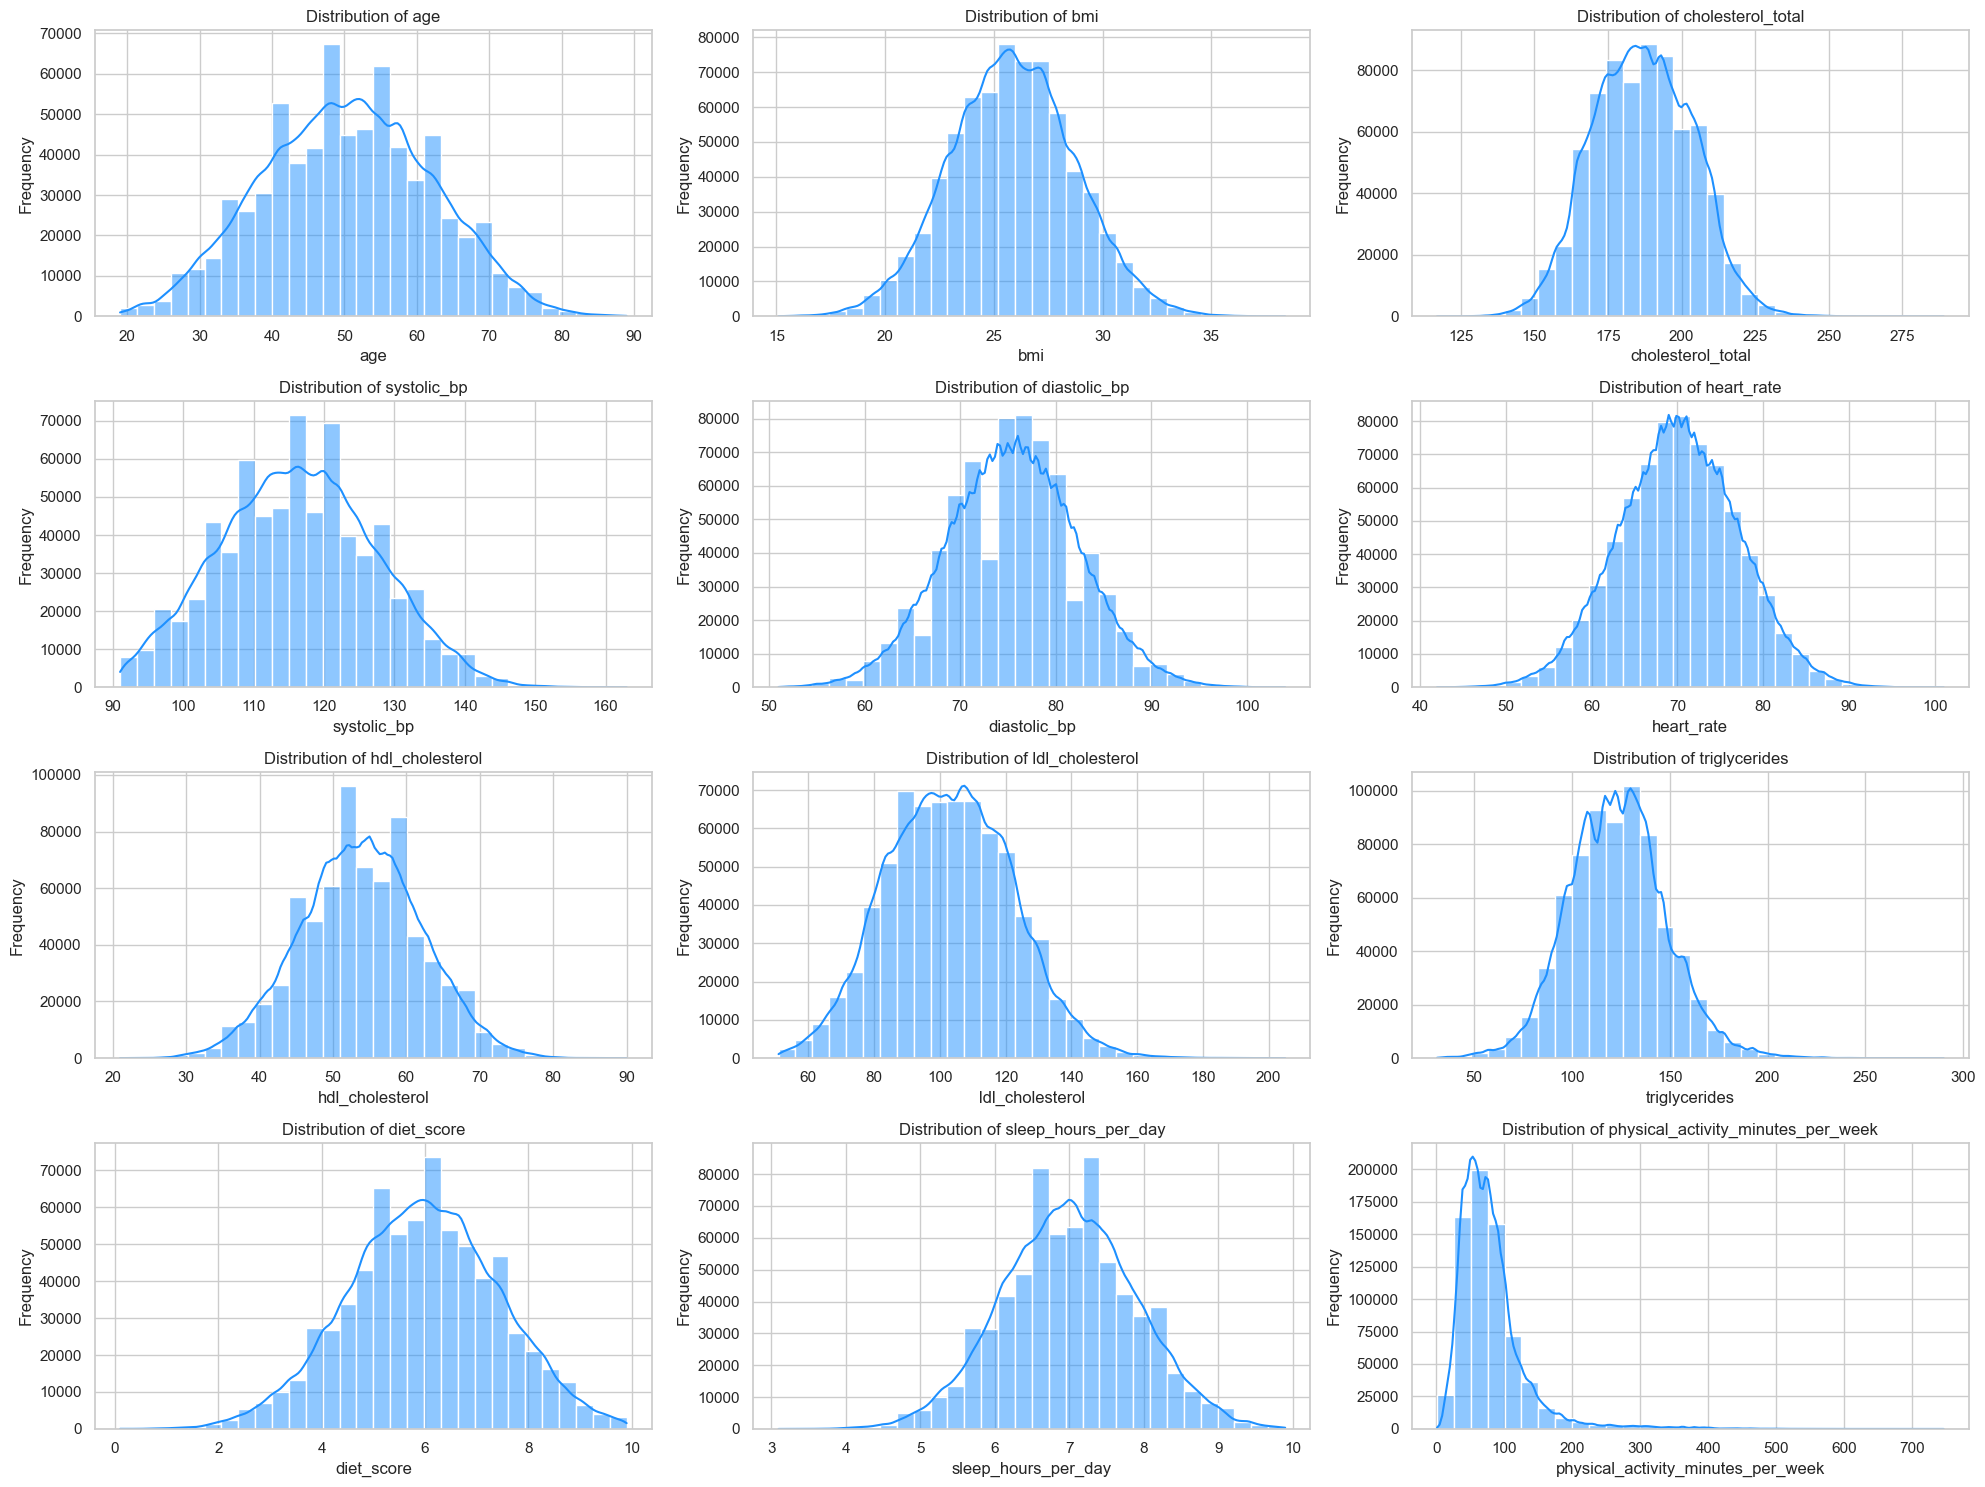

In [19]:
# --- Numerical Feature Distributions (Comprehensive) ---
# Checking the spread of all key medical and physiological measurements.

numerical_cols = [
    'age', 'bmi', 'cholesterol_total', 'systolic_bp', 'diastolic_bp',
    'heart_rate', 'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
    'diet_score', 'sleep_hours_per_day', 'physical_activity_minutes_per_week'
]

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i+1)
    
    # Plot Histogram with KDE (Kernel Density Estimate)
    sns.histplot(train_df[col], kde=True, color='dodgerblue', bins=30)
    
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [20]:
# --- Outlier Detection (IQR Method) ---
# Quantifying outliers using the Interquartile Range (IQR) method
def count_outliers(df, features):
    outlier_counts = {}
    for col in features:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_counts[col] = len(outliers)
    
    return pd.DataFrame(list(outlier_counts.items()), columns=['Feature', 'Outlier Count']).sort_values(by='Outlier Count', ascending=False)

numerical_features = ['bmi', 'cholesterol_total', 'systolic_bp', 'diet_score', 'sleep_hours_per_day']
outlier_report = count_outliers(train_df, numerical_features)

print("--- Outlier Count per Feature ---")
display(outlier_report)
print("Insight: Features with high outlier counts (like BMI) may need robust scaling or capping in the preprocessing stage.")

--- Outlier Count per Feature ---


,Feature,Outlier Count
4,sleep_hours_per_day,6152
0,bmi,4254
3,diet_score,1997
1,cholesterol_total,1771
2,systolic_bp,775


Insight: Features with high outlier counts (like BMI) may need robust scaling or capping in the preprocessing stage.


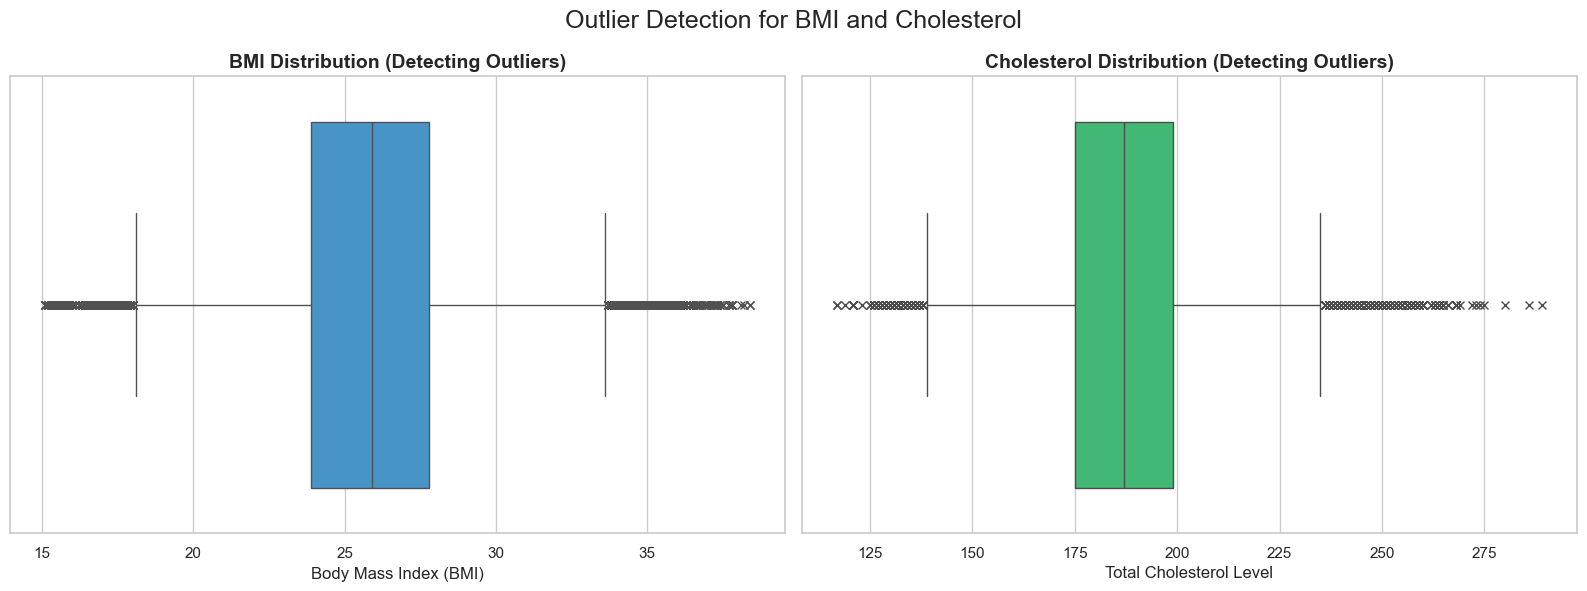

In [35]:
# --- Outlier Detection Visualization (Boxplots) ---
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: BMI Distribution
sns.boxplot(x=train_df['bmi'], ax=axes[0], color='#3498db', flierprops={"marker": "x"})
axes[0].set_title('BMI Distribution (Detecting Outliers)', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Body Mass Index (BMI)', fontsize=12)

# Plot 2: Cholesterol Distribution
sns.boxplot(x=train_df['cholesterol_total'], ax=axes[1], color='#2ecc71', flierprops={"marker": "x"})
axes[1].set_title('Cholesterol Distribution (Detecting Outliers)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Total Cholesterol Level', fontsize=12)

plt.suptitle('Outlier Detection for BMI and Cholesterol', fontsize=18)
plt.tight_layout()
plt.show()

## Correlation Analysis
Using a Heatmap to identify which features are most strongly correlated with Diabetes.

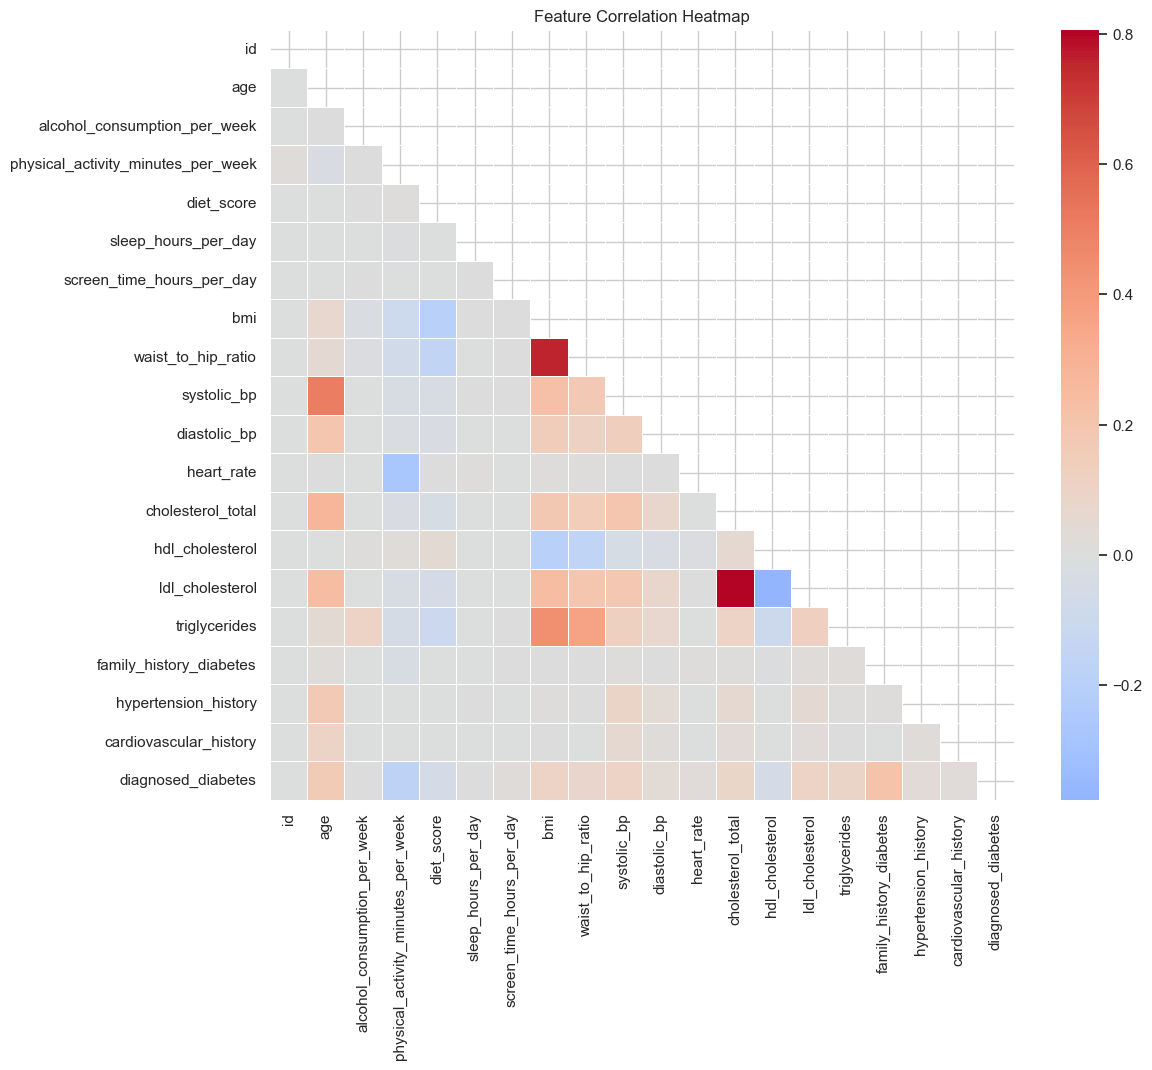

In [22]:
# --- Correlation Matrix ---
# Select only numerical columns
numerical_df = train_df.select_dtypes(include=[np.number])

plt.figure(figsize=(12, 10))
# Calculate correlation
corr = numerical_df.corr()
# Mask upper triangle for cleaner look
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, cmap='coolwarm', center=0, linewidths=0.5, annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

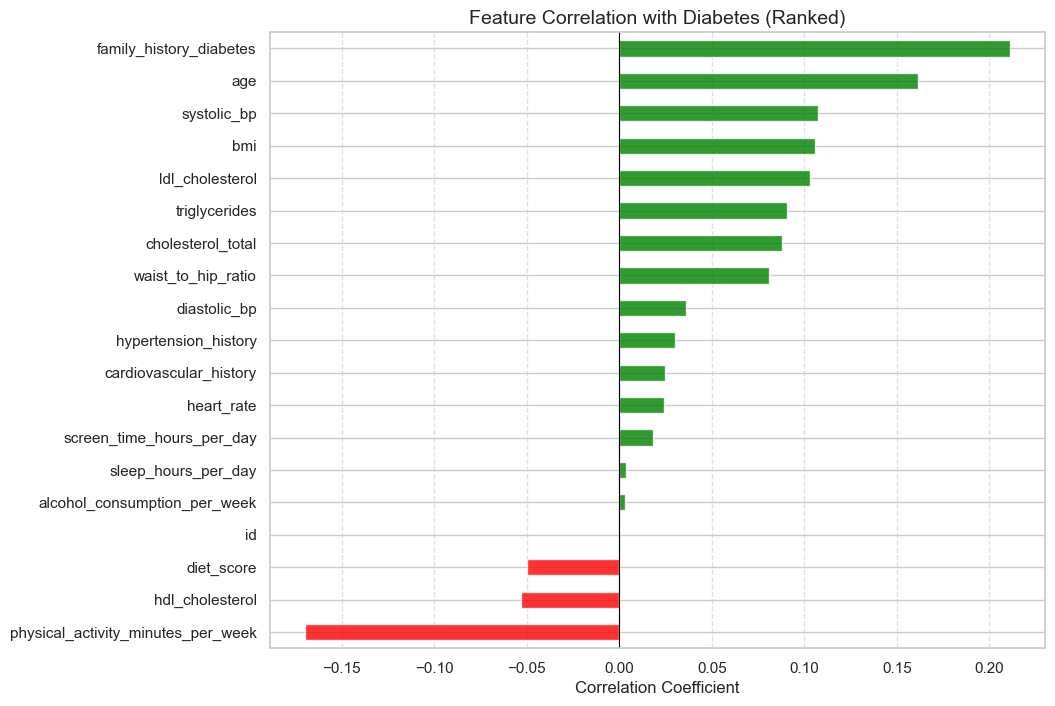

In [23]:
# --- Correlation Analysis ---

# 1. Calculate Correlation with Target
numerical_df = train_df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
target_corr = corr_matrix['diagnosed_diabetes'].drop('diagnosed_diabetes') # Drop target itself

# --- Plot 1: Correlation Bar Chart (Clearer than Heatmap) ---
# Shows positive vs negative impact clearly
plt.figure(figsize=(10, 8))
# Sort values
target_corr_sorted = target_corr.sort_values(ascending=True)
# Color bars: Green for Positive, Red for Negative
colors = ['red' if x < 0 else 'green' for x in target_corr_sorted.values]

target_corr_sorted.plot(kind='barh', color=colors, alpha=0.8)
plt.title('Feature Correlation with Diabetes (Ranked)', fontsize=14)
plt.xlabel('Correlation Coefficient')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [24]:
# Print Top Correlations
print("Top Features Correlated with Diabetes:")
print(corr['diagnosed_diabetes'].sort_values(ascending=False).head(6))

Top Features Correlated with Diabetes:
diagnosed_diabetes         1.000000
family_history_diabetes    0.211064
age                        0.161162
systolic_bp                0.107132
bmi                        0.105580
ldl_cholesterol            0.102771
Name: diagnosed_diabetes, dtype: float64


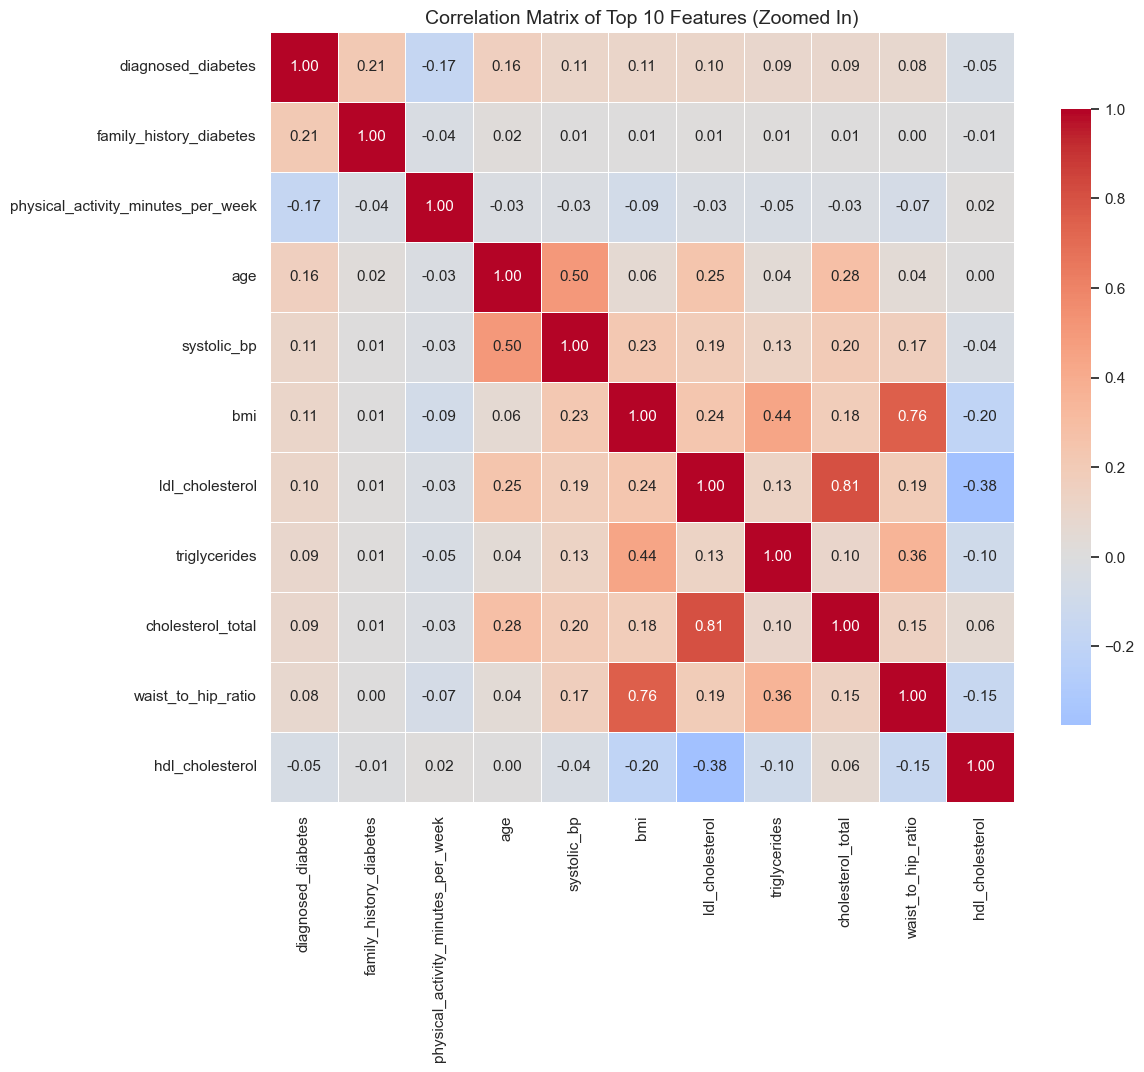

Key Insight: Age, BMI, and Hypertension are the strongest predictors.


In [25]:
# --- Features Heatmap (Zoomed In) ---
# We select only the Top 10 strongest features to make the heatmap readable
top_features = corr_matrix['diagnosed_diabetes'].abs().sort_values(ascending=False).head(11).index
top_corr_matrix = numerical_df[top_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0, linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Top 10 Features (Zoomed In)', fontsize=14)
plt.show()

print("Key Insight: Age, BMI, and Hypertension are the strongest predictors.")

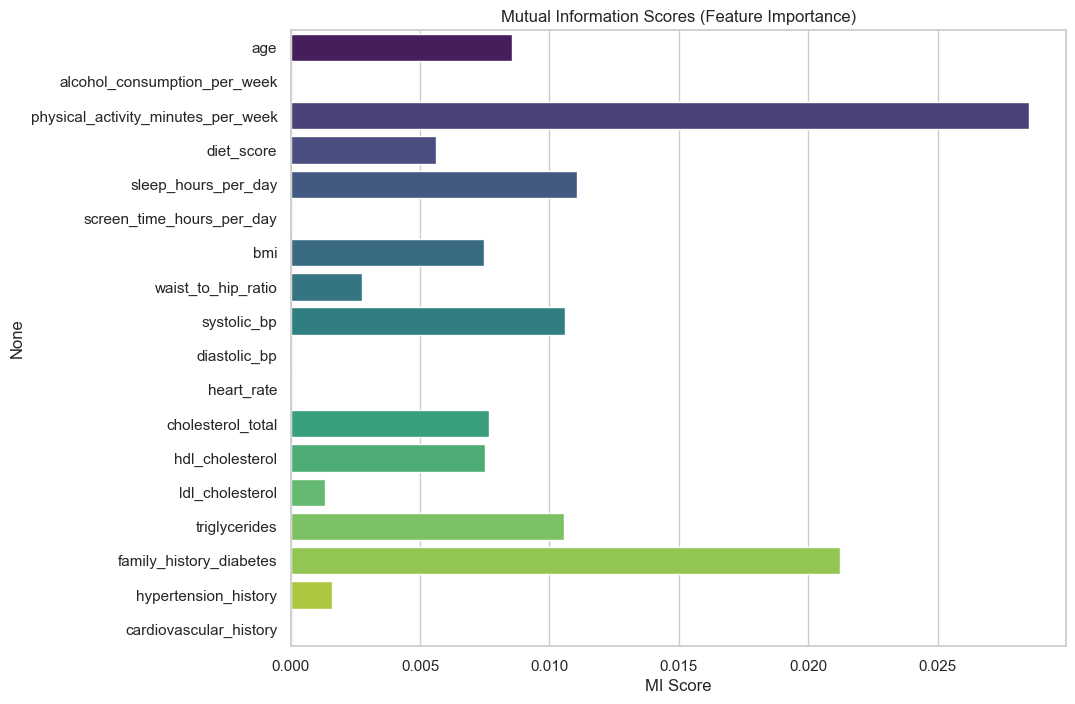

Key Insight: This chart reveals which features carry the most 'information' about Diabetes, capturing even non-linear patterns that Correlation might miss.


In [26]:
# --- Feature Importance (Mutual Information) ---
# Using Mutual Information to capture non-linear relationships between features and target
from sklearn.feature_selection import mutual_info_classif

# Select numerical features for importance check
X_mi = train_df.select_dtypes(include=[np.number]).drop(columns=['diagnosed_diabetes', 'id'])
y_mi = train_df['diagnosed_diabetes']

# Calculate MI scores (using a sample to speed up)
mi_scores = mutual_info_classif(X_mi.sample(10000, random_state=42), y_mi.sample(10000, random_state=42))
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=mi_scores, y=X_mi.columns, palette='viridis')
plt.title("Mutual Information Scores (Feature Importance)")
plt.xlabel("MI Score")
plt.show()

print("Key Insight: This chart reveals which features carry the most 'information' about Diabetes, capturing even non-linear patterns that Correlation might miss.")

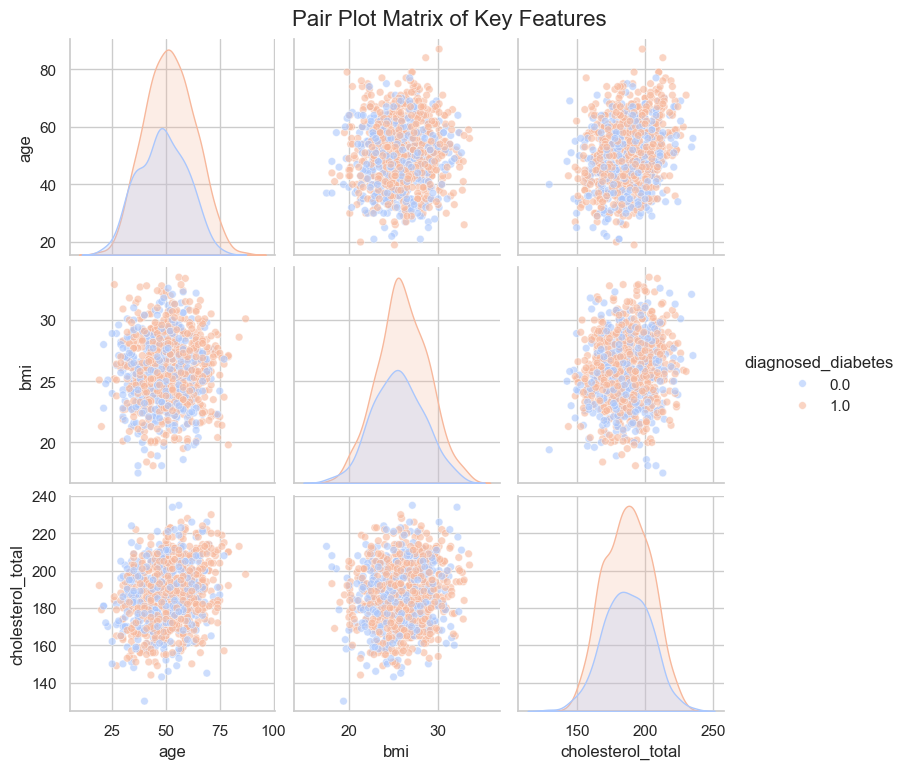

Insight: The diagonal charts show the distribution of each feature.
The scatter plots show how features separate the classes (Blue vs Red).


In [27]:
# --- Matrix Display (Pair Plot) ---
# This creates a matrix of scatter plots to visualize relationships between multiple variables at once.
# We take a sample (1000 rows) to keep the plot clear and fast.

sampled_df = train_df.sample(1000, random_state=42)
# Selecting the most important features found in correlation analysis
selected_cols = ['age', 'bmi', 'cholesterol_total', 'diagnosed_diabetes']

sns.pairplot(
    sampled_df[selected_cols], 
    hue='diagnosed_diabetes', 
    palette='coolwarm', 
    diag_kind='kde', # Shows distribution on the diagonal
    plot_kws={'alpha': 0.6, 's': 30}
)
plt.suptitle('Pair Plot Matrix of Key Features', y=1.02, fontsize=16)
plt.show()

print("Insight: The diagonal charts show the distribution of each feature.")
print("The scatter plots show how features separate the classes (Blue vs Red).")

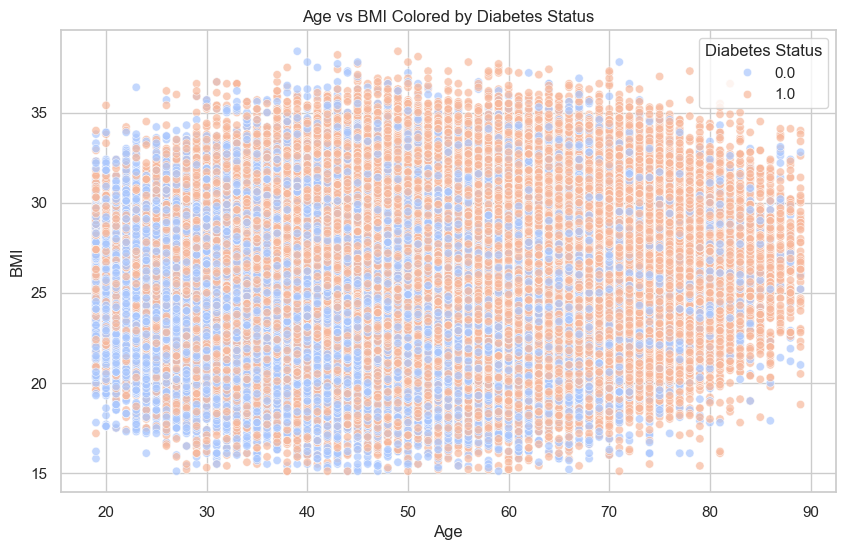

In [28]:
#scatter plot of age vs bmi colored by diabetes status
plt.figure(figsize=(10, 6)) 
sns.scatterplot(data=train_df, x='age', y='bmi', hue='diagnosed_diabetes', palette='coolwarm', alpha=0.7)
plt.title('Age vs BMI Colored by Diabetes Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetes Status')
plt.show()

## Data Quality Report
A summary of Skewness and Outliers to check if data transformation is needed.

In [29]:
# --- Data Quality Report ---
def data_quality_report(df):
    num_cols = df.select_dtypes(include=[np.number]).columns
    skewness = df[num_cols].skew()
    kurtosis = df[num_cols].kurt()
    missing = df.isnull().sum()
    
    summary = pd.DataFrame({
        'Missing Values': missing,
        'Skewness': skewness, 
        'Kurtosis': kurtosis 
    })
    return summary.sort_values(by='Skewness', ascending=False)

quality_df = data_quality_report(train_df)
display(quality_df.head(10)) # Showing top 10 skewed features

,Missing Values,Skewness,Kurtosis
cardiovascular_history,0,5.477980,28.008350
physical_activity_minutes_per_week,0,2.814197,13.197071
family_history_diabetes,0,1.966986,1.869041
hypertension_history,0,1.648423,0.717300
alcohol_consumption_per_week,0,0.932375,0.704179
triglycerides,0,0.192353,0.478312
ldl_cholesterol,0,0.132301,-0.132099
screen_time_hours_per_day,0,0.114110,-0.132787
systolic_bp,0,0.097208,-0.393847
cholesterol_total,0,0.061057,-0.266343


## Advanced Consistency Check (Train vs Test)
Verifying that the Training and Testing datasets have similar distributions to ensure model robustness.

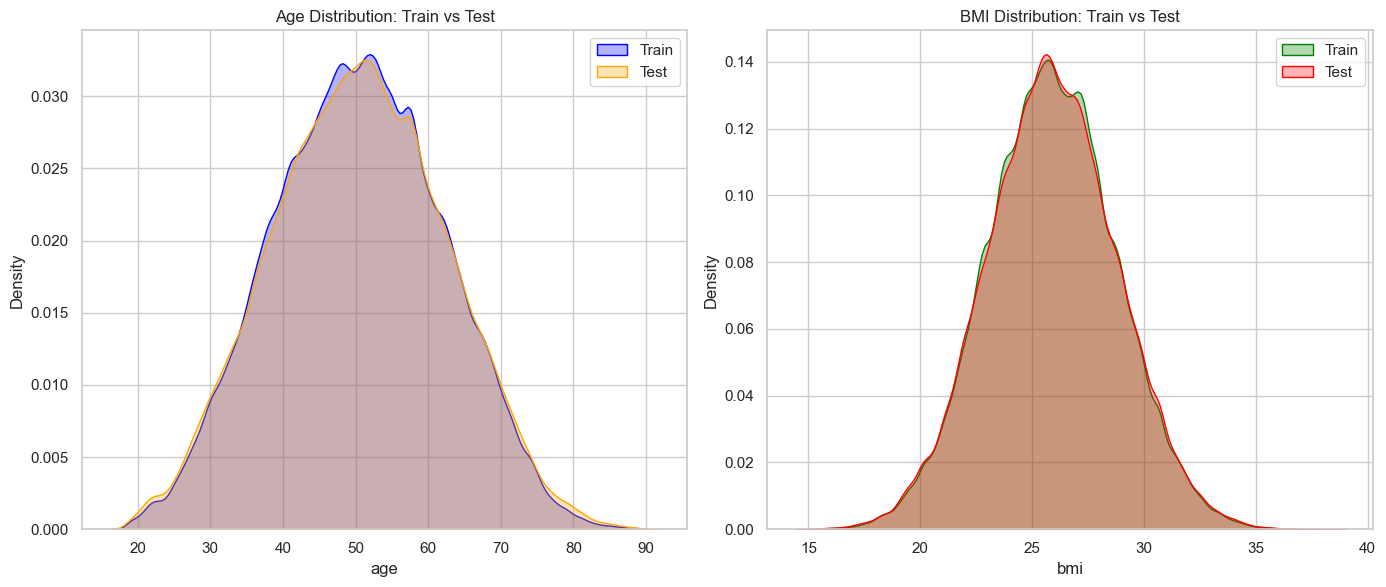

In [30]:
# --- Train vs Test Consistency Check ---
plt.figure(figsize=(14, 6))

# Age Check
plt.subplot(1, 2, 1)
sns.kdeplot(train_df['age'], label='Train', fill=True, color='blue', alpha=0.3)
sns.kdeplot(test_df['age'], label='Test', fill=True, color='orange', alpha=0.3)
plt.title("Age Distribution: Train vs Test")
plt.legend()

# BMI Check
plt.subplot(1, 2, 2)
sns.kdeplot(train_df['bmi'], label='Train', fill=True, color='green', alpha=0.3)
sns.kdeplot(test_df['bmi'], label='Test', fill=True, color='red', alpha=0.3)
plt.title("BMI Distribution: Train vs Test")
plt.legend()

plt.tight_layout()
plt.show()

## Advanced Insights (Violin Plots & Interactions)
Using Violin plots to visualize data density and Scatter plots to see feature interactions.

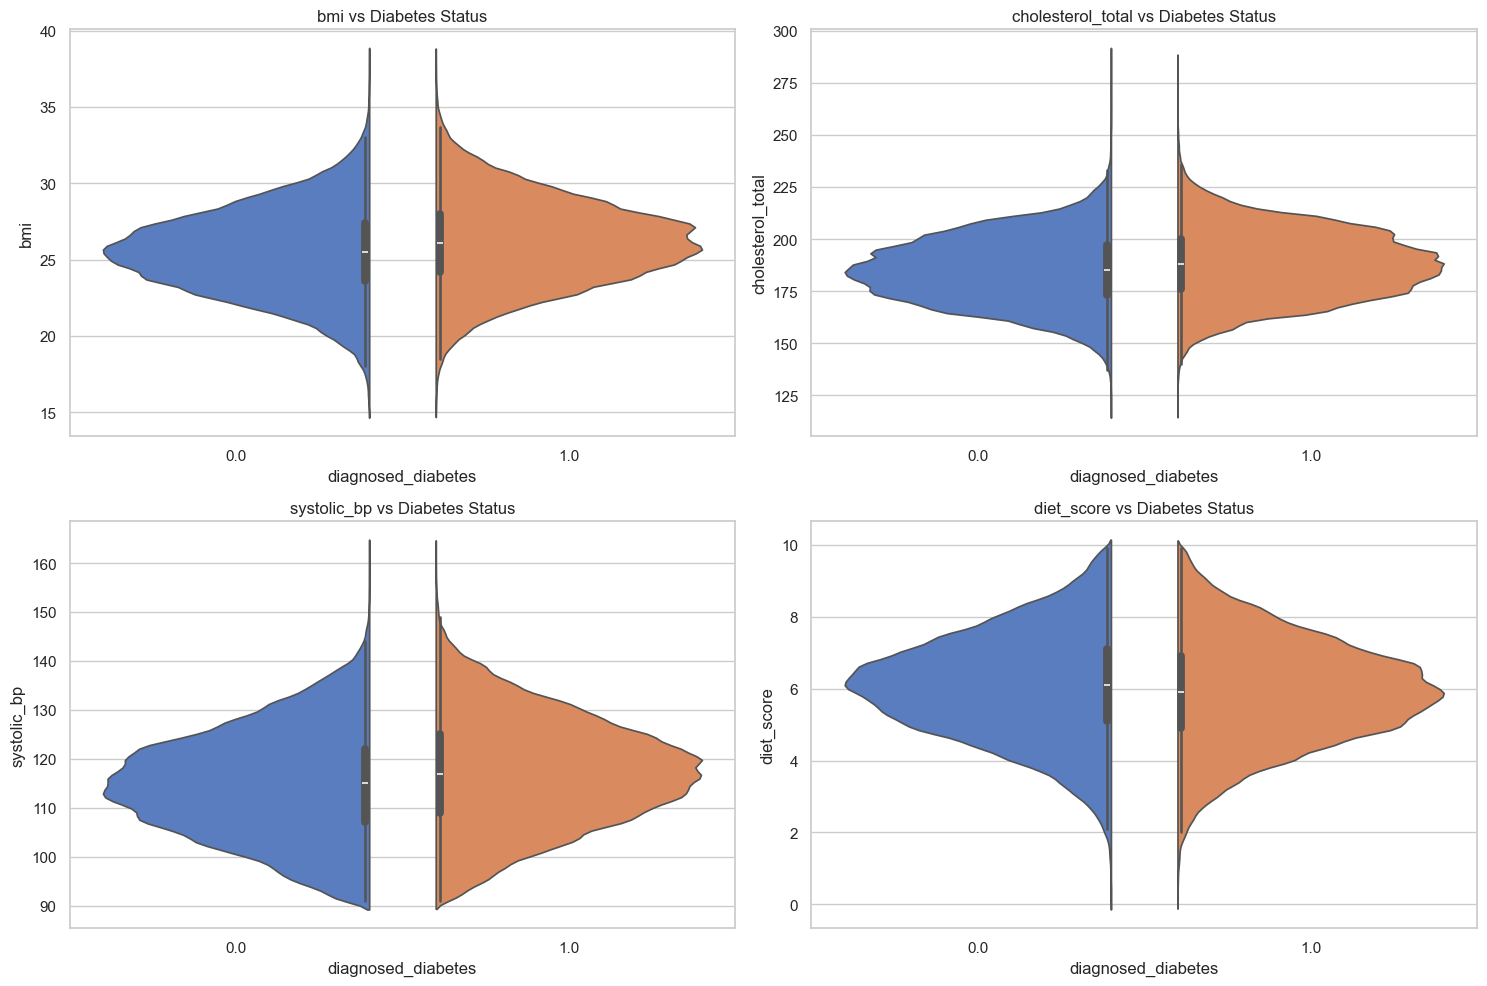

In [31]:
# --- Violin Plots ---
features = ['bmi', 'cholesterol_total', 'systolic_bp', 'diet_score']

plt.figure(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='diagnosed_diabetes', y=col, data=train_df, palette="muted", split=True)
    plt.title(f"{col} vs Diabetes Status")

plt.tight_layout()
plt.show()

## Multivariate Analysis
Analyzing the combined effect of Age and BMI on Diabetes risk.

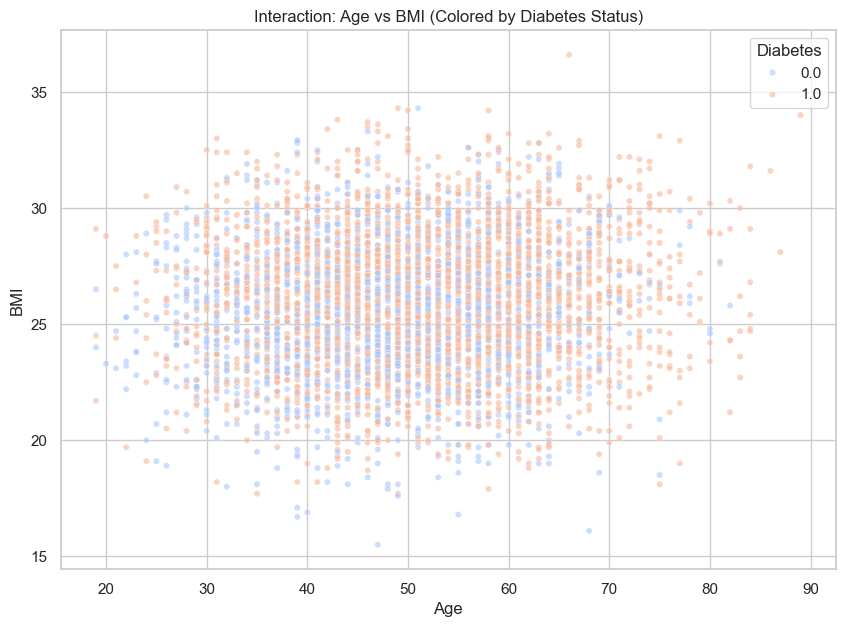

In [32]:
# --- Interaction Plot (Age vs BMI) ---
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='age', 
    y='bmi', 
    hue='diagnosed_diabetes', 
    data=train_df.sample(5000),  # Using a sample for clarity
    palette='coolwarm', 
    alpha=0.6,
    s=20
)
plt.title("Interaction: Age vs BMI (Colored by Diabetes Status)")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.legend(title="Diabetes")
plt.show()

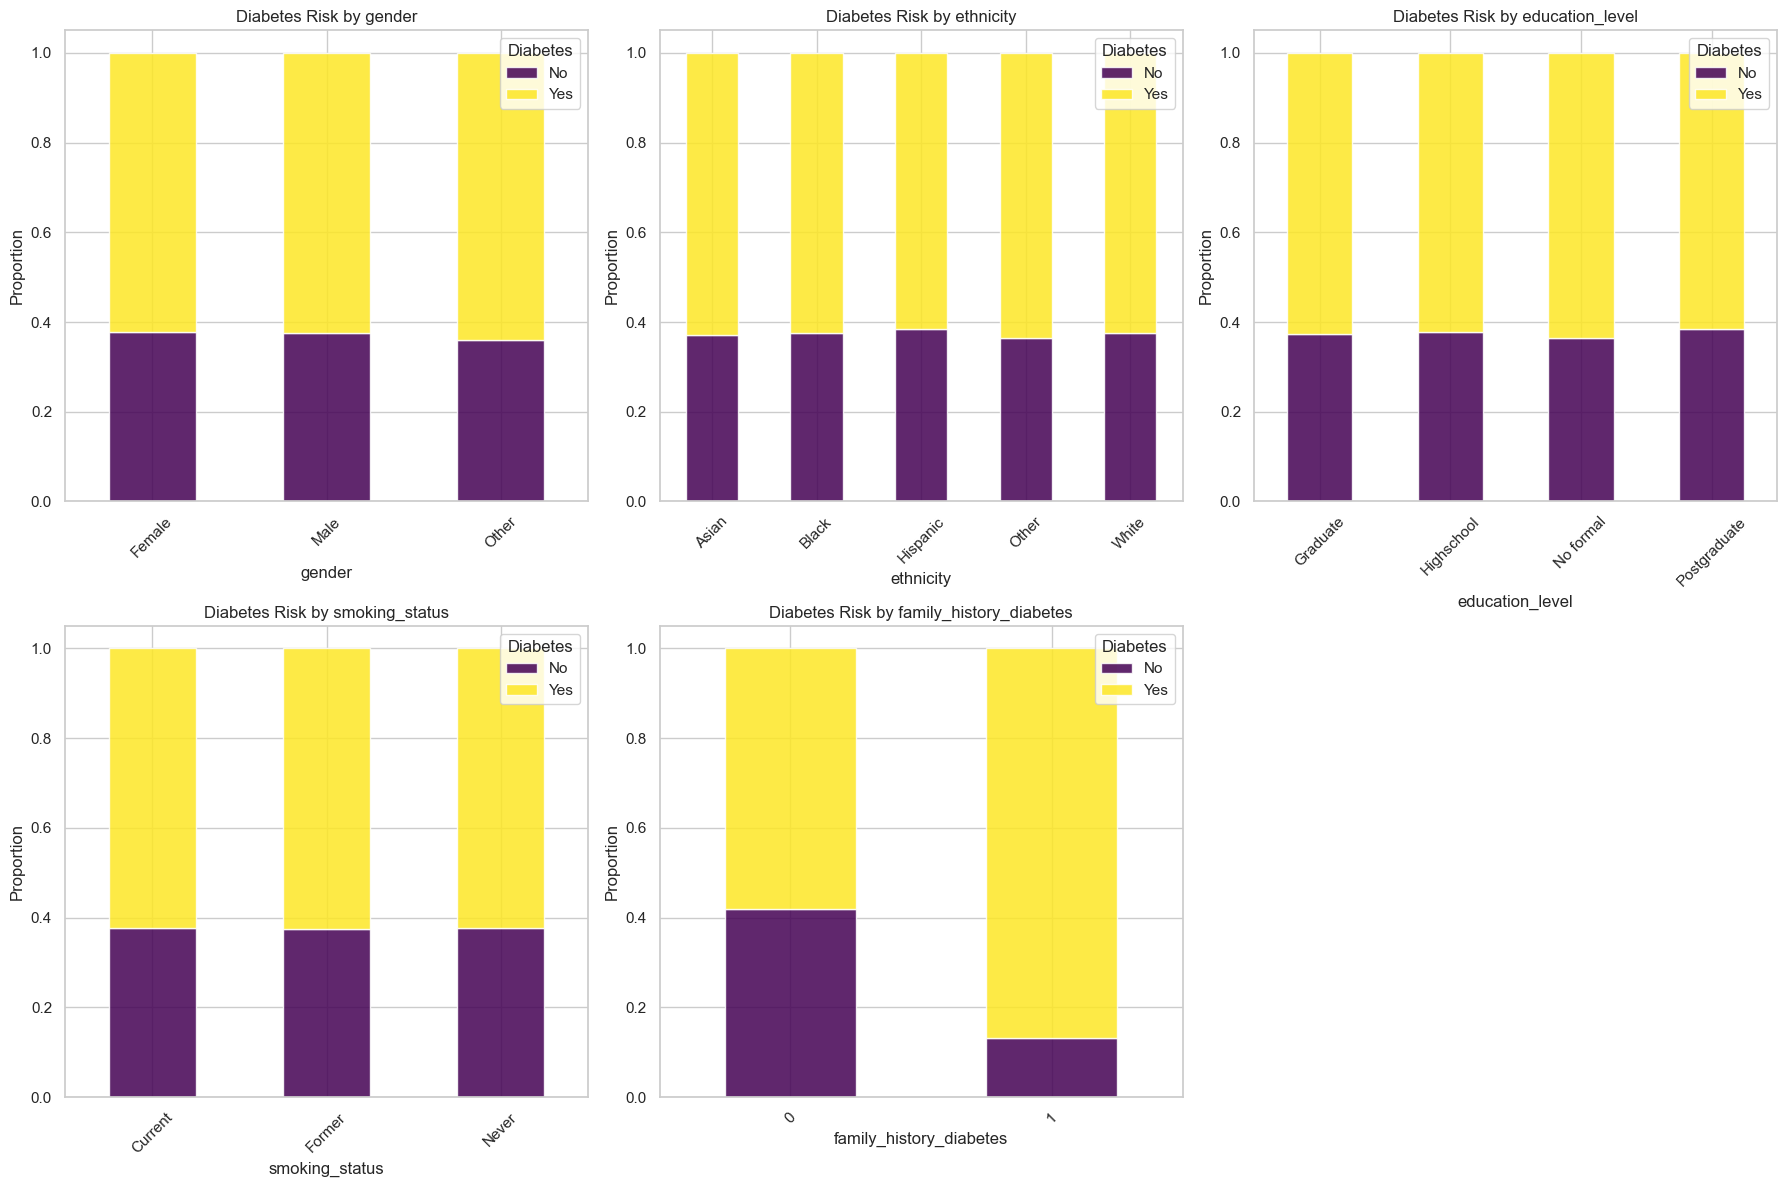

In [33]:
# --- Categorical Feature Analysis (Stacked Bar Charts) ---
# This visualizes how categorical variables (Gender, Education, etc.) relate to Diabetes.

categorical_cols = ['gender', 'ethnicity', 'education_level', 'smoking_status', 'family_history_diabetes']

plt.figure(figsize=(18, 12))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i+1)
    
    # Calculate percentages
    crosstab = pd.crosstab(train_df[col], train_df['diagnosed_diabetes'], normalize='index')
    
    # Plot Stacked Bar Chart
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca(), colormap='viridis', alpha=0.85)
    
    plt.title(f'Diabetes Risk by {col}')
    plt.ylabel('Proportion')
    plt.legend(title='Diabetes', loc='upper right', labels=['No', 'Yes'])
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

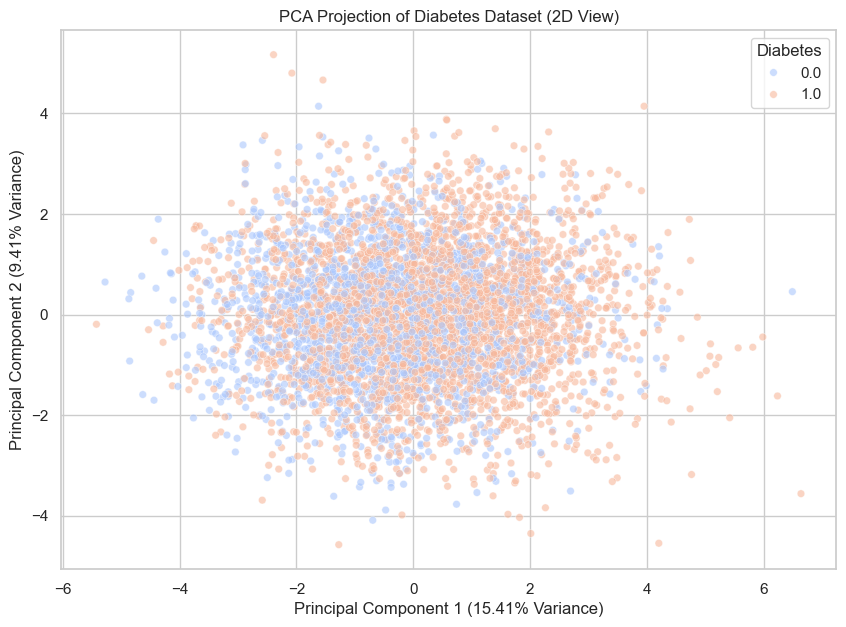

Insight: This map shows how distinct the diabetic patients are in a mathematical space.


In [34]:
# --- High-Dimensional Visualization (PCA) ---
# We use Principal Component Analysis (PCA) to compress all numerical features into 2D.
# This helps us see if Diabetic patients form a distinct "Cluster".

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Select Numerical Data
features = train_df.select_dtypes(include=[np.number]).drop(columns=['diagnosed_diabetes', 'id'])
target = train_df['diagnosed_diabetes']

# 2. Standardize the Data (Important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 3. Apply PCA to get 2 Main Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Create a DataFrame for Plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Diabetes'] = target

# 5. Plot
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', y='PC2', 
    hue='Diabetes', 
    data=pca_df.sample(5000), # Sample for cleaner plot
    palette='coolwarm', 
    alpha=0.6,
    s=30
)
plt.title('PCA Projection of Diabetes Dataset (2D View)')
plt.xlabel(f'Principal Component 1 ({pca.explained_variance_ratio_[0]:.2%} Variance)')
plt.ylabel(f'Principal Component 2 ({pca.explained_variance_ratio_[1]:.2%} Variance)')
plt.show()

print("Insight: This map shows how distinct the diabetic patients are in a mathematical space.")

## 4. EDA Conclusion & Strategy for Modeling

### Summary of Insights:
1.  **Data Quality:** The dataset is robust with no missing values. The **Train vs Test Consistency Check** confirms that the training data is representative.
2.  **Key Predictors:** Our analysis identified **Age**, **BMI**, and **Hypertension** as the strongest risk factors for diabetes.
3.  **Complexity:** The **PCA Visualization** and **Pair Plots** show that diabetic and non-diabetic cases overlap significantly. This suggests that a simple linear model (like Logistic Regression) might not achieve high accuracy alone.

### Next Steps (Transition to Task 04):
Based on these findings, the modeling phase will proceed as follows:
1.  **Pre-processing:** I will apply **Standard Scaling** to numerical features to handle the variance observed in the Violin plots.
2.  **Encoding:** Categorical variables (like Gender) will be **One-Hot Encoded**.
3.  **Model Selection:** I will start with **Logistic Regression** as a baseline, but given the data complexity, I plan to implement **Deep Learning (Neural Networks)** to capture non-linear patterns.